# Required SPECT sensitivity

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Parameters

In [2]:
ACT_CONCENTRATION = 1        # kBq/mL
EXPOSURE = 30.               # minutes
SPATIAL_RES = 6.             # mm FWHM
REQ_COUNTS = 1               # counts
REQ_UNCERT = 0.10            # Fraction
NOISE_FRACTION = 0.15        # Fraction
FOV_VOLUME = 1.8*0.4*0.4     # m3

## Sensitivity formula

In [3]:
def req_sensi(act_conc, #kBq/mL
              noise_fraction=NOISE_FRACTION,
              spatial_res=SPATIAL_RES, #mm
              req_counts=REQ_COUNTS, 
              exposure=EXPOSURE, #s
              req_uncert=REQ_UNCERT,
             ):
    act_conc *= 1000.  # kBq/mL->Bq/mL
    spatial_res /= 10. # mm->cm
    spatial_res /= 2.  # Diameter -> Radius
    exposure *= 60.    # min -> s
    
    # sres_volume = 4./3.*np.pi*spatial_res**3  # Spherical voxel
    sres_volume = (2*spatial_res)**3  # Cubic voxel

    sensi_vox = (1+2*noise_fraction)*1.e6/(req_uncert**2*act_conc*sres_volume*exposure) # cps/MBq

    sensi = sensi_vox*req_counts
    
    return sensi  # cps/MBq


In [4]:
# Test
sensi_cps = req_sensi(act_conc=1.,
                      noise_fraction=0.0,
                      spatial_res=1., #mm
                      req_counts=1, 
                      exposure=1., #s
                      req_uncert=REQ_UNCERT)
print('Req. sensi_cps = %.2fcps/MBq'%sensi_cps)

Req. sensi_cps = 1666666.67cps/MBq


In [5]:
act_concs = np.logspace(-0.5,2,100)
sensis_cps_noise100pct = np.array([req_sensi(act_conc,noise_fraction=1.0) for act_conc in act_concs])
sensis_cps_noise50pct = np.array([req_sensi(act_conc,noise_fraction=0.50) for act_conc in act_concs])
sensis_cps_noise15pct = np.array([req_sensi(act_conc,noise_fraction=0.15) for act_conc in act_concs])
sensis_cps_noise5pct = np.array([req_sensi(act_conc,noise_fraction=0.05) for act_conc in act_concs])
sensis_cps_noise0pct = np.array([req_sensi(act_conc,noise_fraction=0.0) for act_conc in act_concs])


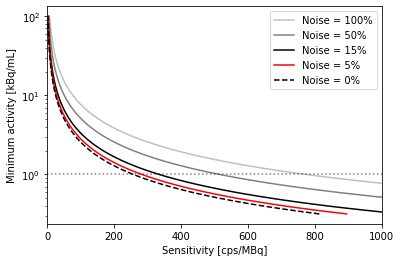

In [6]:
plt.plot(sensis_cps_noise100pct,act_concs,label='Noise = 100%',color='Black',alpha=0.25)
plt.plot(sensis_cps_noise50pct,act_concs,label='Noise = 50%',color='Black',alpha=0.5)
plt.plot(sensis_cps_noise15pct,act_concs,label='Noise = 15%',color='Black')
plt.plot(sensis_cps_noise5pct,act_concs,label='Noise = 5%',color='Red')
plt.plot(sensis_cps_noise0pct,act_concs,label='Noise = 0%',color='Black',linestyle='--')
plt.plot([0,1000],[1.,1.],color='Black',alpha=0.5,linestyle=':')
plt.xlabel('Sensitivity [cps/MBq]')
plt.ylabel('Minimum activity [kBq/mL]')
plt.yscale('log')
# plt.xscale('log')
plt.xlim(0,1000.)
plt.legend()
plt.show()

## Sensitivity vs uncertainty

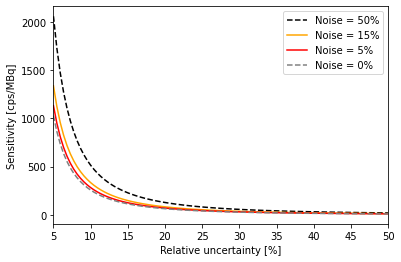

In [10]:
uncerts = np.linspace(0.05,0.5,100)
sensis_cps_noise50pct = np.array([req_sensi(ACT_CONCENTRATION,req_uncert=uncert,noise_fraction=0.50) for uncert in uncerts])
sensis_cps_noise15pct = np.array([req_sensi(ACT_CONCENTRATION,req_uncert=uncert,noise_fraction=0.15) for uncert in uncerts])
sensis_cps_noise5pct = np.array([req_sensi(ACT_CONCENTRATION,req_uncert=uncert,noise_fraction=0.05) for uncert in uncerts])
sensis_cps_noise0pct = np.array([req_sensi(ACT_CONCENTRATION,req_uncert=uncert,noise_fraction=0.0) for uncert in uncerts])

plt.plot(uncerts*100,sensis_cps_noise50pct,label='Noise = 50%',color='Black',linestyle='--')
plt.plot(uncerts*100,sensis_cps_noise15pct,label='Noise = 15%',color='Orange')
plt.plot(uncerts*100,sensis_cps_noise5pct,label='Noise = 5%',color='Red')
plt.plot(uncerts*100,sensis_cps_noise0pct,label='Noise = 0%',color='Gray',linestyle='--')
plt.xlabel('Relative uncertainty [%]')
plt.ylabel('Sensitivity [cps/MBq]')
# plt.yscale('log')
# plt.xscale('log')
plt.xlim(5,50)
plt.legend()
plt.show()

## Sensitivity vs noise

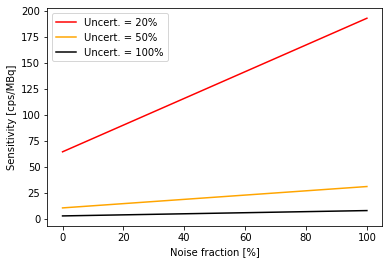

In [8]:
noises = np.linspace(0.0,1.0,100)
sensis_cps_uncert10pct = np.array([req_sensi(ACT_CONCENTRATION,req_uncert=0.1,noise_fraction=noise) for noise in noises])
sensis_cps_uncert20pct = np.array([req_sensi(ACT_CONCENTRATION,req_uncert=0.2,noise_fraction=noise) for noise in noises])
sensis_cps_uncert50pct = np.array([req_sensi(ACT_CONCENTRATION,req_uncert=0.5,noise_fraction=noise) for noise in noises])
sensis_cps_uncert100pct = np.array([req_sensi(ACT_CONCENTRATION,req_uncert=1.0,noise_fraction=noise) for noise in noises])

# plt.plot(noises*100,sensis_cps_uncert10pct,label='Uncert. = 10%',color='Black',linestyle='--')
plt.plot(noises*100,sensis_cps_uncert20pct,label='Uncert. = 20%',color='Red')
plt.plot(noises*100,sensis_cps_uncert50pct,label='Uncert. = 50%',color='Orange')
plt.plot(noises*100,sensis_cps_uncert100pct,label='Uncert. = 100%',color='Black')
plt.xlabel('Noise fraction [%]')
plt.ylabel('Sensitivity [cps/MBq]')
# plt.yscale('log')
# plt.xscale('log')
plt.legend()
plt.show()